# 75% - #1 incomplete, #2 no explanation, #3 should be negative, #4 no integration, #5 missing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Github
%cd 'soil-physics-theory'
%cd 'content/chapter-5'

Mounted at /content/drive
/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/soil-physics-theory
/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-5


5.1
Use the program PSP_travelTimeAnalysis to compute the water content of the soil sample dataTDRSoil.dat. Change the values of bulk density, temperature and solid-phase dielectric permittivity to investigate the effects on the computed water content by using the dielectric mixing model.

In [ ]:
cd PSP_travelTimeAnalysis_NEW/

/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-5/PSP_travelTimeAnalysis_NEW


Soil temperature (C):20
Bulk density (kg/m^3):1000
Permittivity of soil solids (-): 4
File name:TDR/water2.dat
Water content from mixing model
1.068777854187472


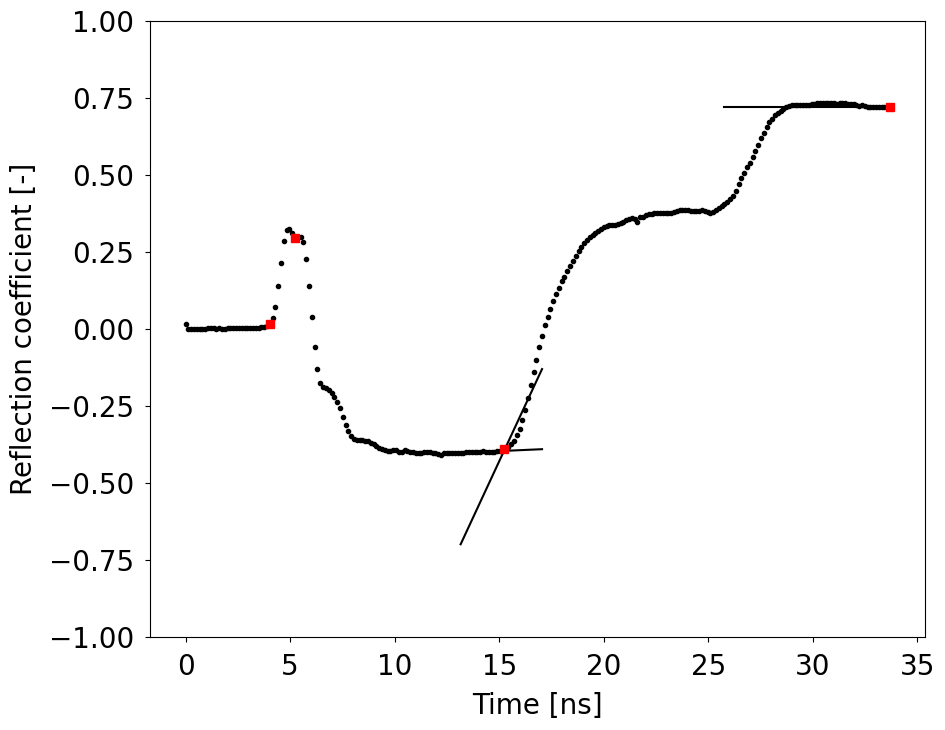

<Figure size 640x480 with 0 Axes>

In [ ]:
run main.py

### 5.2 If the temperature of the soil liquid phase increases, does the bulk dielectric permittivity increase or decrease? What effect would this change have on soil water content computation?

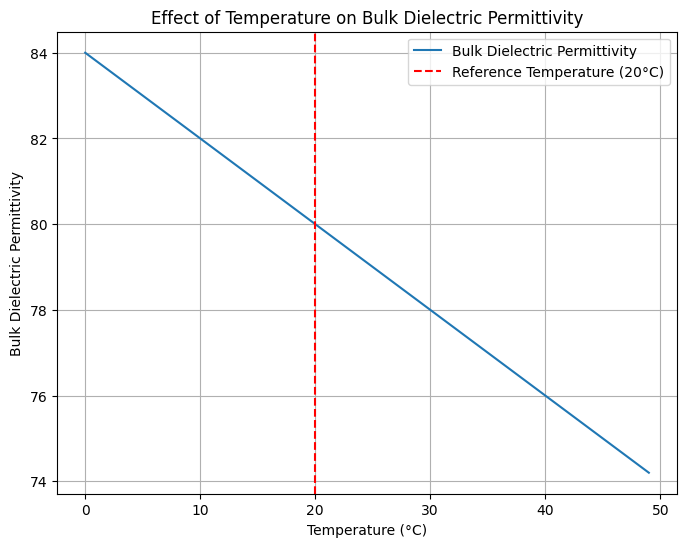

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
temperature_range = np.arange(0, 50, 1)  # Temperature range (°C)
dielectric_permittivity_ref = 80  # Reference dielectric permittivity at 20°C

# Function to compute bulk dielectric permittivity based on temperature
def compute_bulk_permittivity(temperature, permittivity_ref):
    # Assume a linear relationship between temperature and permittivity for this example
    # You may need to use a more accurate model based on your specific scenario
    # Here, we'll use a simple linear relationship for demonstration purposes
    slope = -0.2  # Change in permittivity per degree Celsius
    return permittivity_ref + slope * (temperature - 20)

# Compute bulk dielectric permittivity for the temperature range
bulk_permittivity = compute_bulk_permittivity(temperature_range, dielectric_permittivity_ref)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(temperature_range, bulk_permittivity, label='Bulk Dielectric Permittivity')
plt.title("Effect of Temperature on Bulk Dielectric Permittivity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bulk Dielectric Permittivity")
plt.axvline(x=20, color='r', linestyle='--', label='Reference Temperature (20°C)')
plt.legend()
plt.grid(True)
plt.show()

### 5.3 Compute the matric water potential for water in a saturated pore 10 µm in diameter, at 20 ◦C. The surface tension and liquid density at this temperature are 72.75 × 10–3 N m–1 and 1027.8 kg m–3, respectively

In [ ]:
import math
import numpy as np
r=5/1000000 #μm
temp=20 #c
beta=0
ST=72.75*10**-3. #Nm–1
LD= 1027.8 #kg/m3
water_potential= (2*ST*np.cos(beta))/ (LD*r)
print("matric_water_potential:","%.2f" %water_potential, "kpa")

matric_water_potential: 28.31 kpa


### 5.4 By using the integration presented in the program PSP_columnWaterContent.py, compute the total amount of soil water in a clay soil for a profile that is 1 m deep. Use the parameters presented in Table 5.4

In [ ]:
alpha=0.17 #kgJ^–1
n=1.16
m=1-(1/n)
AirEP=-3.3 #air entry potential  Jkg^–1
thetaR=0.07 #m/m^3
thetaS=0.5 #m/m^3
depth=1 #
Se = 1. / (1. + (alpha * abs(AirEP))**n)**m
print ("water_content:","%.2f" %Se, "m/m3")

water_content: 0.94 m/m3


## Derivatives of Campbell's and van Genuchten's Equations

To derive the capacity of Campbell's and van Genuchten's equations, we need to compute the derivatives of the respective functions with respect to water potential.

### Campbell's Equation

Campbell's equation describes the hydraulic conductivity (K) of soils as a function of water potential (Ψ). It is given by:

\[ K(\Psi) = K_s \exp\left( -\alpha |\Psi|^n \right) \]

To find the derivative of K with respect to Ψ, we differentiate the equation:

\[ \frac{dK}{d\Psi} = -\alpha n K_s |\Psi|^{n-1} \exp\left( -\alpha |\Psi|^n \right) \]

This derivative represents the capacity of Campbell's equation.

### van Genuchten's Equation

van Genuchten's equation describes the volumetric water content (θ) of soils as a function of water potential (Ψ). It is given by:

\[ \theta(\Psi) = \theta_r + \frac{{\theta_s - \theta_r}}{{\left(1 + \left(\frac{{|\Psi|}}{{\alpha}}\right)^n\right)^m}} \]

The derivative of θ with respect to Ψ can be found using the chain rule:

\[ \frac{d\theta}{d\Psi} = \frac{{-n \alpha \left( \theta_s - \theta_r \right) |\Psi|^{n-1}}}{{\left(1 + \left(\frac{{|\Psi|}}{{\alpha}}\right)^n\right)^{m+1}}} \]

This derivative represents the capacity of van Genuchten's equation.


## Problem 5.6
**Compute the water content at field capacity (assume ψFC = –33 J kg–1), and permanent wilting point (assume ψPWP = –1500 J kg–1) using van Genuchten’s equation for a soil having the following parameters: α = 0.15, n = 1.35, θr = 0.01 and θs = 0.46. The units of water potential are J kg–1. Plant available water is assumed to be the difference between these values. Compute the plant available water of the soil.**

In [ ]:
from __future__ import print_function, division
import math
import numpy as np
thetas=0.46
thetar=0.01
alpha=0.15
n=1.35
m=1-(1/n)
psi_FC=33
psi_PWP=1500
VWC_FC = thetar + (thetas - thetar) * (1/(1 + (alpha * (psi_FC))**n)**m)
VWC_PWP = thetar + (thetas - thetar) * (1/(1 + (alpha * (psi_PWP))**n)**m)
PAW=VWC_FC-VWC_PWP
print("vwc @ -33 kPa =", "%.2f" %(VWC_FC), "m^3/m^3")
print("vwc @ -1500 kPa =", "%.2f" %(VWC_PWP), "m^3/m^3")
print("Plant_available_water =","%.2f" %(PAW), "m^3/m^3")

vwc @ -33 kPa = 0.26 m^3/m^3
vwc @ -1500 kPa = 0.08 m^3/m^3
Plant_available_water = 0.18 m^3/m^3


### Derivation of Capacity for Campbell's Equation
Campbell's equation:
θ=θs(1+αψ/ψ )^-β
Where:
	θ is the volumetric water content
	θs is the saturated volumetric water content
	ψ is the water potential
	α and β are empirical parameters
To compute the derivative of Campbell's equat on with respect to ψ, we use the chain rule:
dθ/dψ=dθ/(d(αψ/∣ψ∣)) ⋅(d(αψ/∣ψ∣))/dψ
Now, let's derive the derivative:
dθ/dψ=-βθs(1+αψ/(∣ψ∣))^(-(β+1) )*  α/(∣ψ∣)

Derivation of Capacity for van Genuchten's Equation
van Genuchten's equation:
θ=θr+(θs-θr)*((1+αψ/(∣ψ∣))^n )^-m
Where:
	θ is the volumetric water content
	θr is the residual volumetric water content
	θs is the saturated volumetric water content
	ψ is the water potential
	α, n, and m are empirical parameters
To compute the derivative of van Genuchten's equation with respect to ψ, we use the chain rule as well.
dθ/dψ=(θs-θr)m(1+(αψ/(∣ψ∣)))^n)^-(m+1)  *αn/(∣ψ∣)
These derivatives provide insights into how the water content changes with respect to changes in water potential, which is crucial in understanding soil water retention characteristics.


In [ ]:
θ=θs(1+αψ/ψ )^-β

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/Github
%cd 'soil-physics-theory'
%cd 'content/chapter-5'

Mounted at /content/drive
/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/soil-physics-theory
/content/drive/MyDrive/Github/soil-physics-theory/content/chapter-5


In [ ]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as image
import numpy as np
from __future__ import division


In [ ]:
%run PSP_waterRetention.py

Exception: File `'PSP_waterRetention.py'` not found.

In [ ]:
def main():
    choice = 0
    print (soil.CAMPBELL,' Campbell')
    print (soil.VAN_GENUCHTEN,' van Genuchten')
    while (choice < soil.CAMPBELL) or (choice > soil.VAN_GENUCHTEN):
        choice = float(input("Choose water retention curve: "))
        if (choice < soil.CAMPBELL) or (choice > soil.VAN_GENUCHTEN):
            print('wrong choice.')
    soil.waterRetentionCurve = choice

    waterTableDepth = 2.0
    nrValues = 100
    step = waterTableDepth/nrValues

    integral = qsimp(soil.waterContent, -waterTableDepth*9.81, 0)
    totalWaterContent = integral / 9.81
    print ("\nTotal water content [m2/m2]:", totalWaterContent)

    x = np.zeros(nrValues+1, float)
    y = np.zeros(nrValues+1, float)
    for i in range(nrValues+1):
        y[i] = step*i
        psi = y[i] - waterTableDepth
        psi *= 9.81
        x[i] = soil.waterContent(psi)
main()


NameError: name 'soil' is not defined

In [ ]:
from __future__ import print_function, division

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as image
import numpy as np
import PSP_soil.py as soil
from PSP_integration import qsimp

def main():
    choice = 0
    print (soil.CAMPBELL,' Campbell')
    print (soil.VAN_GENUCHTEN,' van Genuchten')
    while (choice < soil.CAMPBELL) or (choice > soil.VAN_GENUCHTEN):
        choice = float(input("Choose water retention curve: "))
        if (choice < soil.CAMPBELL) or (choice > soil.VAN_GENUCHTEN):
            print('wrong choice.')
    soil.waterRetentionCurve = choice

    waterTableDepth = 2.0
    nrValues = 100
    step = waterTableDepth/nrValues

    integral = qsimp(soil.waterContent, -waterTableDepth*9.81, 0)
    totalWaterContent = integral / 9.81
    print ("\nTotal water content [m2/m2]:", totalWaterContent)

    x = np.zeros(nrValues+1, float)
    y = np.zeros(nrValues+1, float)
    for i in range(nrValues+1):
        y[i] = step*i
        psi = y[i] - waterTableDepth
        psi *= 9.81
        x[i] = soil.waterContent(psi)
main()

ModuleNotFoundError: No module named 'PSP_soil'

In [ ]:
print()

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(x, y, 'k', linewidth='3')
#plt.legend('[Total Amount of Soil Water in Clay]', loc="upper center", frameon = False)
plt.xlabel('water content [m$^2$ m$^{-2}$]',fontsize=20,labelpad=8)
plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
plt.show()

NameError: name 'x' is not defined

<Figure size 1000x800 with 0 Axes>